# Namish Rathy 
# E23CSEU0608 

# Objective:
To provide hands-on experience in implementing and applying a Convolutional Neural
Network (CNN) to classify images from the CIFAR-10 dataset, evaluate its performance, and
compare the results of different configurations.

In [6]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import keras

print(tf.__version__)

2.19.0


In [7]:
cifar10 = tf.keras.datasets.cifar10
(X_train , Y_train) , (X_test , Y_test) = cifar10.load_data()

# Data Preprocessing


0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

In [8]:
Y_train[0]

array([6], dtype=uint8)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
Y_test = Y_test.flatten()
Y_train = Y_train.flatten()

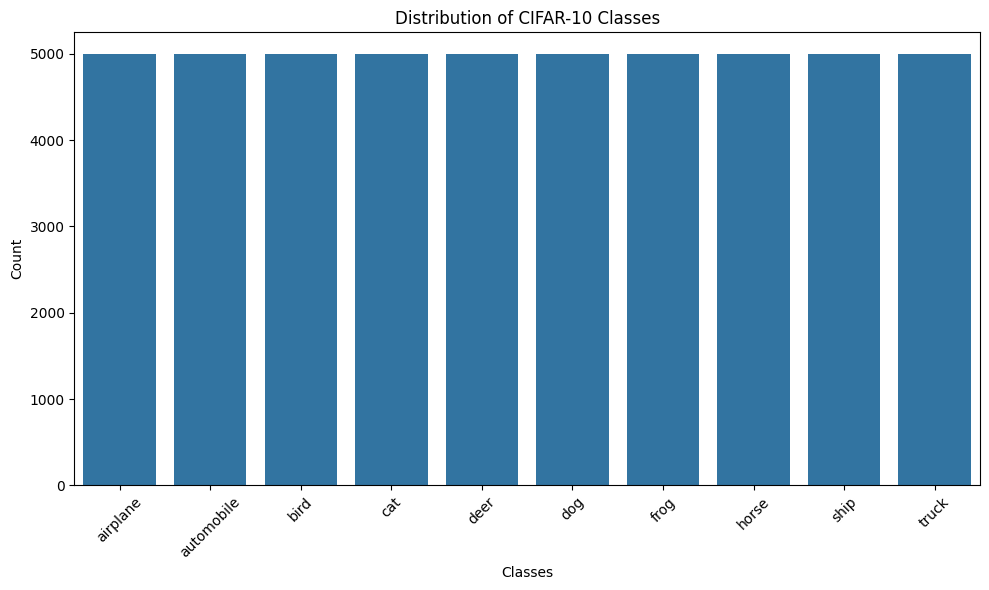

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,6))
p = sns.countplot(x=Y_train.flatten())

# Fix the x-axis ticks properly
p.set_xticks(range(len(classes)))
p.set_xticklabels(classes, rotation=45)  # Rotate for better visibility

plt.title('Distribution of CIFAR-10 Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.tight_layout()  # Fix label clipping
plt.show()

# Check for Na Values

In [12]:
np.isnan(X_train).any()

np.False_

In [13]:
np.isnan(X_test).any()

np.False_

# Normalization and Reshaping

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_train = X_train/255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_test = X_test/255

# Label Encoding

In [15]:
Y_train = tf.one_hot(Y_train.astype(np.int32), depth=10)
Y_test = tf.one_hot(Y_test.astype(np.int32), depth=10)

In [16]:
Y_train[3]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)>

# Visualize Data

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


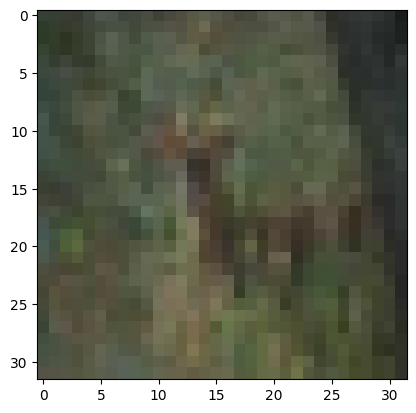

In [17]:
plt.imshow(X_train[10] , interpolation='nearest')
print(Y_train[10])

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


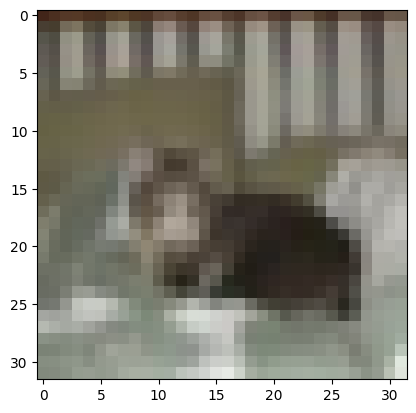

In [18]:
plt.imshow(X_train[150])
print(Y_train[150])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


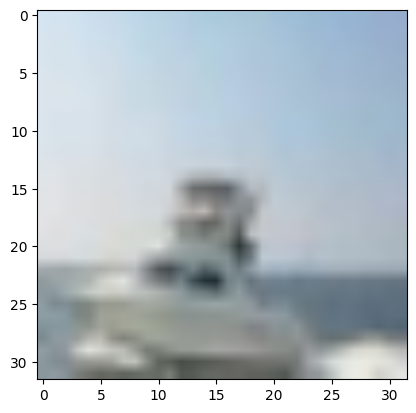

In [19]:
plt.imshow(X_train[100] , interpolation='bilinear')
print(Y_train[100])

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


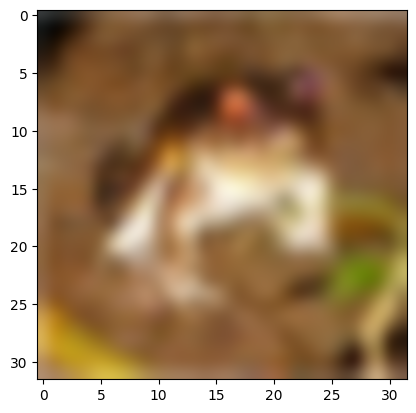

In [20]:
plt.imshow(X_train[0] , interpolation='bicubic')
print(Y_train[0])

# CNN

In [21]:
batch_size = 32
num_classes = 10
epochs = 30

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]), 
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam()  , loss= 'categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(X_train, Y_train , batch_size=batch_size, epochs=epochs)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3645 - loss: 1.7358
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5740 - loss: 1.2063
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6268 - loss: 1.0596
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6553 - loss: 0.9767
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6805 - loss: 0.9126
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6975 - loss: 0.8477
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7166 - loss: 0.8053
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7300 - loss: 0.7637
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7391 - loss: 0.7352
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7463 - loss: 0.7124
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7624 - loss: 0.6726
Epoch 12

# Evaluate the Model

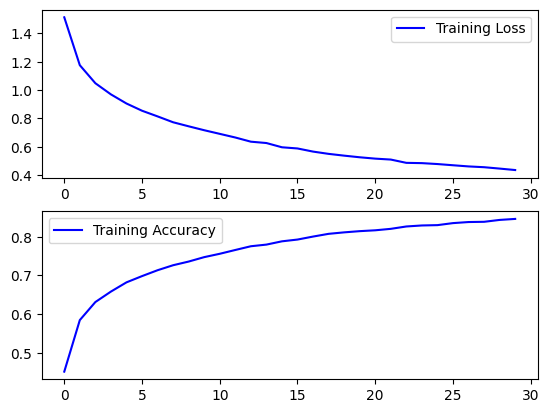

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='blue', label ='Training Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], color='blue', label='Training Accuracy')
ax[1].legend()
plt.show()

# Predict Results

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7545 - loss: 0.8072


# Confusion Matrix

In [27]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_test_classes = np.argmax(Y_test, axis = 1)

confussion_mxt = tf.math.confusion_matrix(Y_test_classes, Y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


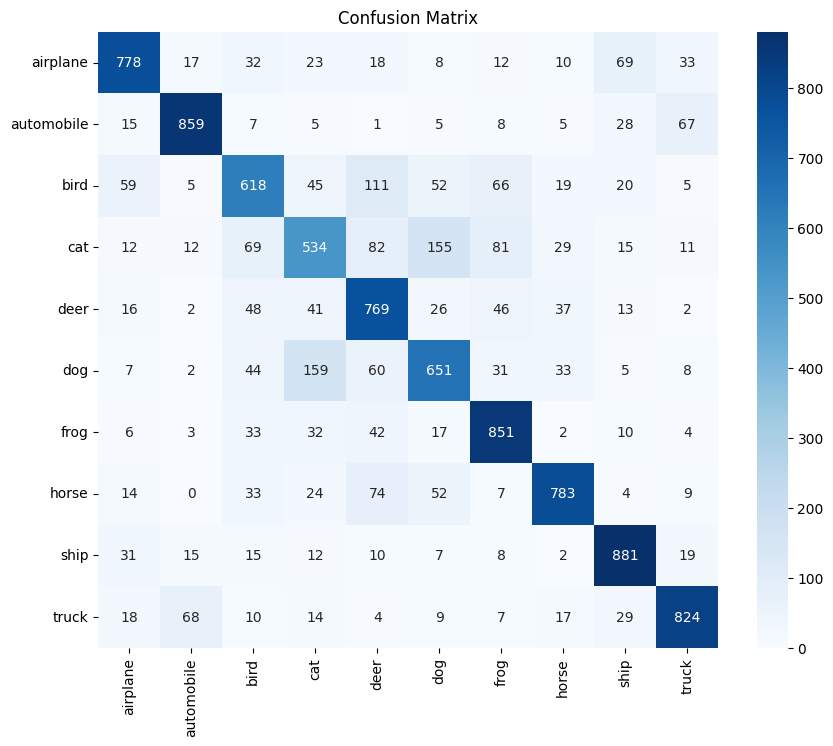

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(confussion_mxt, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.show()

# Outcomes

* Model Architecture & Training:

A Convolutional Neural Network (CNN) was trained using the CIFAR-10 dataset over 30 epochs, achieving a final training accuracy of 85.01% with a loss of 0.4262, indicating effective learning and convergence.


* Testing Performance:

On unseen test data, the model achieved a test accuracy of 75.45%, which shows a generalization gap of ~10% from training, suggesting mild overfitting and scope for regularization.

* Class-wise Prediction Analysis (Confusion Matrix):

High accuracy observed for "ship" (881) and "frog" (851) classes, indicating strong feature distinction.
Confusion observed between "cat" vs. "dog" and "bird" vs. "cat/deer", likely due to similar visual features across classes.

* Misclassification Observations:

"Truck" was misclassified as "automobile" in 68 cases – a realistic overlap due to vehicle similarities.
"Cat" and "dog" showed notable confusion, with 159 dog samples classified as cat and 155 cat samples misclassified as dog, highlighting the need for finer feature extraction.

* Model Robustness:

The steady increase in accuracy and decrease in loss over epochs indicates good training stability. Dropout layers contributed to reduced overfitting, but further optimization may be needed to boost test accuracy beyond 80%.

* Scope for Improvement:

1.Introduce data augmentation (e.g., rotation, zoom, flip) to reduce overfitting.


2.Fine-tune the CNN by adjusting learning rate, batch size, or adding BatchNormalization layers.


3.Explore pre-trained models like VGG16 or ResNet for transfer learning on CIFAR-10.
